<a href="https://colab.research.google.com/github/rup-ak/Number_Plate_Recognition_System/blob/main/ANPR_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.1 Install Dependency**

In [ ]:
!pip install easyocr
!pip install imutils
!pip install matplotlib

**1.2 Import Dependency and Mount the Drive**

In [2]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import easyocr
import imutils
import numpy as np
import tensorflow as tf
import time

In [3]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Train and Test the dataset**

**2.1 Train the dataset**

In [4]:


# Set the path to the dataset
data_path = "/content/drive/MyDrive/ANPR/Dataset/Dataset/train"

# Get the list of classes
classes = sorted(os.listdir(data_path))

# Create a dictionary to map class names to integers
class_to_index = {cls: idx for idx, cls in enumerate(classes)}

# Initialize the input and output arrays
X = []
y = []

# Load the images and labels into memory
for cls in classes:
    cls_path = os.path.join(data_path, cls)
    for file in os.listdir(cls_path):
        img_path = os.path.join(cls_path, file)
        img = cv.imread(img_path)
        img = cv.resize(img, (64, 64))
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        X.append(img)
        y.append(class_to_index[cls])

# Convert the input and output arrays to NumPy arrays
X = np.array(X)
y = np.array(y)

# Add a channel dimension to the input array
X = np.expand_dims(X, axis=-1)

# Convert the labels to one-hot encoding
y = tf.keras.utils.to_categorical(y)

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

# Train the model
history = model.fit(X, y, epochs=20)

end_time = time.time()

# Print the training accuracy at each epoch
print(history.history['accuracy'])



Epoch 1/20
160/160 [==============================] - 16s 94ms/step - loss: 14.0461 - accuracy: 0.8535
Epoch 2/20
160/160 [==============================] - 15s 92ms/step - loss: 0.4697 - accuracy: 0.9509
Epoch 3/20
160/160 [==============================] - 15s 93ms/step - loss: 0.1528 - accuracy: 0.9724
Epoch 4/20
160/160 [==============================] - 15s 92ms/step - loss: 0.0872 - accuracy: 0.9820
Epoch 5/20
160/160 [==============================] - 15s 93ms/step - loss: 0.0599 - accuracy: 0.9863
Epoch 6/20
160/160 [==============================] - 15s 92ms/step - loss: 0.0288 - accuracy: 0.9908
Epoch 7/20
160/160 [==============================] - 15s 92ms/step - loss: 0.0394 - accuracy: 0.9932
Epoch 8/20
160/160 [==============================] - 15s 92ms/step - loss: 0.0831 - accuracy: 0.9867
Epoch 9/20
160/160 [==============================] - 15s 92ms/step - loss: 0.2096 - accuracy: 0.9679
Epoch 10/20
160/160 [==============================] - 21s 130ms/step - loss: 0.0

In [5]:
print("Training time: {:.2f} seconds".format(end_time - start_time))

Training time: 303.68 seconds


 **2.2 Check if the test dataset is available**

In [6]:

test_data_path = "/content/drive/MyDrive/ANPR/Dataset/Dataset/test"

# Check if the test dataset directory exists
if not os.path.exists(test_data_path):
    print("Test dataset directory not found")
else:
    # Check if the subdirectories for each class exist
    for cls in classes:
        cls_path = os.path.join(test_data_path, cls)
        if not os.path.exists(cls_path):
            print(f"Subdirectory for class {cls} not found")


 **2.3 Test the dataset**

In [7]:

# Set the path to the test dataset
test_data_path = "/content/drive/MyDrive/ANPR/Dataset/Dataset/test"

# Initialize the test input and output arrays
test_X = []
test_y = []

# Load the test images and labels into memory
for cls in classes:
    cls_path = os.path.join(test_data_path, cls)
    for file in os.listdir(cls_path):
        img_path = os.path.join(cls_path, file)
        img = cv.imread(img_path)
        img = cv.resize(img, (64, 64))
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        test_X.append(img)
        test_y.append(class_to_index[cls])

# Convert the test input and output arrays to NumPy arrays
test_X = np.array(test_X)
test_y = np.array(test_y)

# Add a channel dimension to the test input array
test_X = np.expand_dims(test_X, axis=-1)

# Convert the test labels to one-hot encoding
test_y = tf.keras.utils.to_categorical(test_y)


start_time = time.time()

# Train the model and save the history object
history = model.fit(X, y, epochs=20, validation_data=(test_X, test_y))

end_time = time.time()

Epoch 1/20
160/160 [==============================] - 15s 95ms/step - loss: 5.6540e-04 - accuracy: 0.9996 - val_loss: 0.8870 - val_accuracy: 0.9261
Epoch 2/20
160/160 [==============================] - 15s 94ms/step - loss: 4.5473e-04 - accuracy: 1.0000 - val_loss: 0.8863 - val_accuracy: 0.9261
Epoch 3/20
160/160 [==============================] - 15s 94ms/step - loss: 3.0913e-04 - accuracy: 1.0000 - val_loss: 0.9061 - val_accuracy: 0.9261
Epoch 4/20
160/160 [==============================] - 15s 94ms/step - loss: 3.9501e-04 - accuracy: 0.9998 - val_loss: 0.8968 - val_accuracy: 0.9261
Epoch 5/20
160/160 [==============================] - 15s 94ms/step - loss: 2.5613e-04 - accuracy: 1.0000 - val_loss: 0.9234 - val_accuracy: 0.9310
Epoch 6/20
160/160 [==============================] - 17s 106ms/step - loss: 1.9624e-04 - accuracy: 1.0000 - val_loss: 0.8937 - val_accuracy: 0.9261
Epoch 7/20
160/160 [==============================] - 15s 94ms/step - loss: 3.1259e-04 - accuracy: 1.0000 - val

In [8]:
# Print the testing time
print("Validation time: {:.2f} seconds".format(end_time - start_time))

Validation time: 322.00 seconds


# **3.1 Check the accuracy of training and testing datset and save the model**

In [9]:
# Evaluate the model on the training dataset
train_loss, train_acc = model.evaluate(X, y)
print('Training accuracy:', train_acc)


# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_X, test_y)
print('Test accuracy:', test_acc)

160/160 [==============================] - 4s 24ms/step - loss: 1.4725e-05 - accuracy: 1.0000
Training accuracy: 1.0
7/7 [==============================] - 0s 24ms/step - loss: 0.9361 - accuracy: 0.9310
Test accuracy: 0.931034505367279


In [10]:
# Save the trained model for future use
model.save('/content/drive/MyDrive/ANPR/Dataset/anpr_model.h5')
print('Model saved successfully.')

Model saved successfully.


 **3.2 Show the accuracy of training and testing in graph**

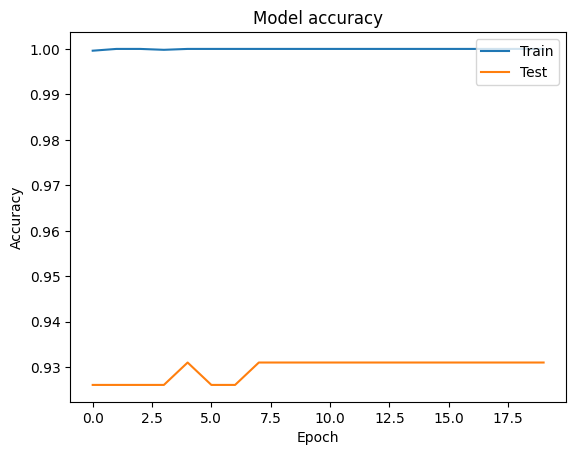

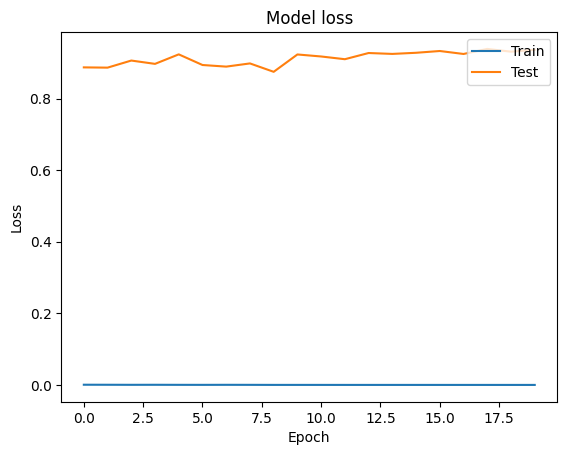

In [11]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper right')
plt.show()


# **4.1 Now predict the class of an Image**

In [19]:
# Load the saved model
saved_model_path = "//content/drive/MyDrive/ANPR/Dataset/anpr_model.h5"
model = tf.keras.models.load_model(saved_model_path)

# Load the image you want to predict
img_path = "/content/img1.png"
img = cv.imread(img_path)
img = cv.resize(img, (64, 64))
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = np.expand_dims(img, axis=-1)
img = np.expand_dims(img, axis=0)

start_time = time.time()

# Predict the class of the image using the model
pred = model.predict(img)
class_idx = np.argmax(pred)
class_name = classes[class_idx]

end_time = time.time()

print("The predicted class is:", class_name)


1/1 [==============================] - 0s 103ms/step
The predicted class is: Car Number Plate


In [20]:
# Print the testing time
print("Testing time: {:.2f} seconds".format(end_time - start_time))

Testing time: 0.18 seconds


**4.2 Read the saved model and read a new image**

In [25]:

# Load the saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/ANPR/Dataset/anpr_model.h5')

# Read an image in grayscale and Blur
img = cv.imread('/content/img1.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply filter and find edges for localization
bfilter = cv.bilateralFilter(gray, 11, 17, 17) #filter and noise reduction
edge = cv.Canny(bfilter, 100, 250)  #eadge detection



**4.3 Find conturs and Apply Mask**

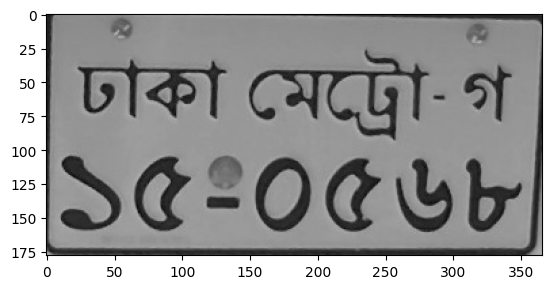

In [26]:

keypoints = cv.findContours(edge.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break


mask = np.zeros(gray.shape, np.uint8)
crop = cv.drawContours(mask, [location], 0, 255, -1)
crop = cv.bitwise_and(img, img, mask=mask)

plt.imshow(cv.cvtColor(crop, cv.COLOR_BGR2RGB))

(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x), np.min(y))
(x2,y2) = (np.max(x), np.max(y))

croped = gray[x1:x2+1, y1:y2+1]

plt.imshow(cv.cvtColor(croped, cv.COLOR_BGR2RGB))

**4.4 Use easy OCR to Read Text and Render Result**

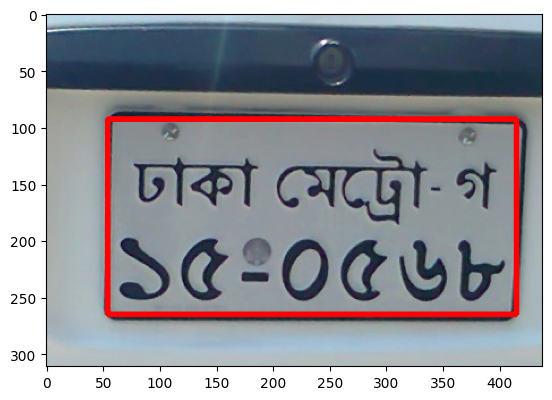

In [27]:
reader = easyocr.Reader(['bn'])
result = reader.readtext(croped)
result

#text = result
font = cv.FONT_HERSHEY_COMPLEX
#res = cv.putText(img, text=text, org=(approx[1][0][0], approx[1][0][1]+120), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv.LINE_AA)
res = cv.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,0,255), 3)
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))


**4.5 Now Showing the result**

In [28]:
print("The predicted class is:", class_name)

print("\nAnd the number plate is: ")

for r in result:
  print(r[1])

The predicted class is: Car Number Plate

And the number plate is: 
ঢাকা মেট্রো-গ
১৫-০৫৬৮
